# 1.このテキストについて

### テキストの目的
- 実データに近いものの分析を行う
- データセットに対して自ら課題を設定できるようにする

### どのように学ぶか
Kaggleのデータセットを通じて、データ分析の流れやライブラリの使い方を学びます。

# 2.信用情報

Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。


[Home Credit Default Risk | Kaggle](https://www.kaggle.com/c/home-credit-default-risk)


Week4では機械学習手法を用いて学習・推定を行います。その準備としてWeek3でデータ探索（EDA）を行います。

# 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。

- Home Creditはどのような企業？
- このコンペティションでは何を予測する？
- それを予測することで企業が得られるメリットは何？

## 解答
- ### Home Creditはどのような企業？

ホームクレジット社は、ポジティブで安全な借入経験を提供することによって、銀行口座を持たない人々のためのファイナンシャル・インクルージョン (貧困層に正規の金融取引ができるように改善する解決策を提供すること) を広めるために努力しています。
この金銭的に不利な人々がポジティブな借入経験を持つことを確実にするために、ホームクレジット社は電話や取引情報を含むさまざまな代替データを利用しています。 そして顧客の返済能力を予測しています。

- ### このコンペティションでは何を予測する？

顧客の返済能力を予測する。

- ### それを予測することで企業が得られるメリットは何？

返済能力のある顧客が無事借入できること、そして顧客がより確実に返済完了できるような借入額、完済日、返済スケジュールを提供することが可能となる。

# データセットの準備
データセットはコンペティションのDataページからapplication_train.csvをダウンロードして使用します。

Dataページ内の他のcsvファイルはこの課題では扱いません。

# 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。

- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスごとのデータ数をグラフに出す

それぞれ結果に対する説明や考察も行ってください。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [125]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

hide_toggle()

In [2]:
# 表示上限を拡張
pd.set_option('display.max_columns', 130)
pd.set_option('display.max_rows', 130)

In [3]:
# データの読み込み
train_data = pd.read_csv('application_train.csv')

In [4]:
# .head()、.info()、describe()などを使う
display(train_data.head())
display(train_data.info())
display(train_data.describe())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


None

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

>307,511件のローンのデータがあり、列数は122です。

In [5]:
# 欠損値の有無を見る
missing_values = train_data.isnull().sum()[train_data.isnull().sum()>0].sort_values(ascending=False)
print(len(missing_values))
missing_values

67


COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
BASEMENTAREA_MODE               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MEDI               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_AVG               169682
NONLIVINGAREA_MODE       

>67個の変数に欠損値があります。

0    282686
1     24825
Name: TARGET, dtype: int64


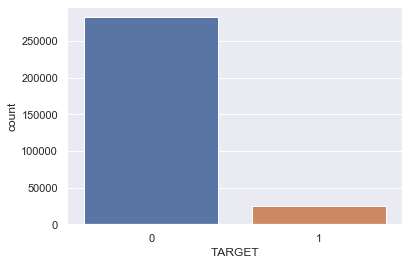

In [6]:
# クラスごとのデータ数をグラフに出す
print(train_data['TARGET'].value_counts())
sns.countplot(x="TARGET", data=train_data);

- 1: 支払が困難なクライアント = クライアントが最初のY回の分割払いの内に少なくとも一回でX日以上延滞していた場合
- 0: それ以外の場合

>データの約9割がラベルが0でした。

# <a id='anchor'>【問題3】課題設定</a>
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

[1. 目的変数との相関の有無を確認](#anchor1)  
[2. カテゴリ変数と目的変数の相関の有無を確認](#anchor2)  
[3. 欠損値を含む行と含まない行で相関に差はあるか？](#anchor3)  
[4. 仮説を立てる](#anchor4)  
[5. 車を所有しているかどうか（FLAG_OWN_CAR）](#anchor5)  
[6. 家またはアパートを所有しているかどうか（FLAG_OWN_REALTY）](#anchor6)  
[7. 収入（AMT_INCOME_TOTAL）](#anchor7)  
[8. 高収入の価格帯でラベルを比較する。](#anchor8)  
[9. 収入タイプ（NAME_INCOME_TYPE）](#anchor9)  
[10. 学歴（NAME_EDUCATION_TYPE）](#anchor10)  
[11. 携帯電話が繋がるかどうか（FLAG_CONT_MOBILE）](#anchor11)  
[12. 職業（OCCUPATION_TYPE）](#anchor12)  
[]

# 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを 15個以上 作成してください。

探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

## <a id='anchor1'>1. 目的変数との相関の有無を確認</a>

In [7]:
train_data.corr()['TARGET'].abs().nlargest(10)

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
Name: TARGET, dtype: float64

>最も相関係数が高い**EXT_SOURCE_3**のスコアでも0.178919と低く、ほとんど相関がないことがわかりました。  
次に、カテゴリー変数の中に相関が強いものがないか確認していきます。

## <a id='anchor2'>2. カテゴリ変数と目的変数の相関の有無を確認</a>

In [8]:
# カテゴリー変数のリストを取得する
s = (train_data.dtypes == 'object')
object_cols = list(s[s].index)

# カテゴリー変数のリストを取得する
s = (train_data.dtypes == 'object')
object_cols = list(s[s].index)

In [9]:
# 欠損値の削除
drop_train_data = train_data.dropna()
drop_train_data.shape

(8602, 122)

In [10]:
# カテゴリ変数をダミー変数に変換
dummies_train_data = pd.get_dummies(drop_train_data[object_cols])
dummies_train_data.shape

(8602, 129)

In [11]:
pd.set_option('display.max_rows', 300)

# TARGET列を結合
dummies_train_data = pd.concat([drop_train_data['TARGET'], dummies_train_data],axis=1)

# 相関係数を求める。
dummies_train_data.corr()['TARGET'].abs().sort_values(ascending=False)

TARGET                                               1.000000
NAME_EDUCATION_TYPE_Secondary / secondary special    0.056370
NAME_EDUCATION_TYPE_Higher education                 0.055673
NAME_CONTRACT_TYPE_Cash loans                        0.045993
NAME_CONTRACT_TYPE_Revolving loans                   0.045993
OCCUPATION_TYPE_Laborers                             0.040112
ORGANIZATION_TYPE_Transport: type 3                  0.038705
NAME_HOUSING_TYPE_With parents                       0.035068
NAME_FAMILY_STATUS_Married                           0.034766
OCCUPATION_TYPE_Core staff                           0.034441
NAME_FAMILY_STATUS_Civil marriage                    0.033327
CODE_GENDER_F                                        0.033103
CODE_GENDER_M                                        0.033103
NAME_HOUSING_TYPE_House / apartment                  0.031929
OCCUPATION_TYPE_Accountants                          0.028109
ORGANIZATION_TYPE_Business Entity Type 3             0.028067
NAME_INC

>カテゴリー変数の中にも相関の強いものはありませんでした。  
<br>＜備考＞  
**FLAG_OWN_CAR_Y**の相関係数がNaNと表示されている理由について、下記のセルから**FLAG_OWN_CAR_Y**のすべてが定数（分散ゼロ）であるため、**TARAGET**との相関が定義されませんでした。

In [12]:
dummies_train_data['FLAG_OWN_CAR_Y'].nunique()

1

## <a id='anchor3'>3. 欠損値を含む行と含まない行で相関に差はあるか？</a>　　　　　　　　　　[▲](#anchor)

>データが欠損していること自体に意味があるかどうかを確認する。

In [13]:
# 欠損値を含む行での相関
train_data[train_data.isnull().any(axis=1)].corr()['TARGET'].abs().nlargest(10)

TARGET                         1.000000
EXT_SOURCE_3                   0.180060
EXT_SOURCE_2                   0.160826
EXT_SOURCE_1                   0.157018
DAYS_BIRTH                     0.080063
REGION_RATING_CLIENT_W_CITY    0.060601
REGION_RATING_CLIENT           0.058907
DAYS_LAST_PHONE_CHANGE         0.055854
DAYS_ID_PUBLISH                0.052172
REG_CITY_NOT_WORK_CITY         0.051522
Name: TARGET, dtype: float64

In [14]:
# 欠損値を含まない行での相関
train_data.dropna().corr()['TARGET'].abs().nlargest(10)

TARGET                         1.000000
EXT_SOURCE_3                   0.150720
EXT_SOURCE_2                   0.130969
EXT_SOURCE_1                   0.129548
DAYS_EMPLOYED                  0.062950
REGION_RATING_CLIENT_W_CITY    0.061214
FLAG_DOCUMENT_3                0.054269
REGION_RATING_CLIENT           0.053614
FLOORSMAX_AVG                  0.046110
FLOORSMAX_MODE                 0.045990
Name: TARGET, dtype: float64

>わずかに欠損値を含む列の方が相関係数が高かったが、いずれにしても相関はないに等しく欠損値の有無に意味はないことがわかりました。よって、現状のデータの形では予測は困難と判断し、新たな特徴量が作れないかを考えていきます。

## <a id='anchor4'>4. 仮説を立てる</a>

>返済能力が高い人は『経済力があり、良識がある』と仮定し、その指標になりそうな特徴量を選択する。

- FLAG_OWN_CAR：　クライアントが車を所有しているかどうかにフラグを立てる
- FLAG_OWN_REALTY：　クライアントが家またはアパートを所有しているかどうかにフラグを立てます
- AMT_INCOME_TOTAL：　クライアントの収入
- NAME_INCOME_TYPE：　クライアントの収入タイプ（ビジネスマン、就労、出産休暇、…）
- NAME_EDUCATION_TYPE：　クライアントが達成した最高の教育のレベル
- FLAG_CONT_MOBILE：　携帯電話にアクセスできましたか（1 =はい、0 =いいえ）
- OCCUPATION_TYPE：　クライアントはどのような職業ですか

## グラフ化

In [15]:
# 可視化しやすくするために、TARGETの割合1:1のデータを作成
graph_data = train_data.copy()
target_0 = train_data[train_data['TARGET']==0]
target_1 = train_data[train_data['TARGET']==1]
target_0 = target_0.sample(n=len(target_1), random_state=0)
graph_data = pd.concat([target_0, target_1])
graph_data = graph_data.reset_index().drop('index', axis=1)

## <a id='anchor5'>5. 車を所有しているかどうか（FLAG_OWN_CAR）</a>

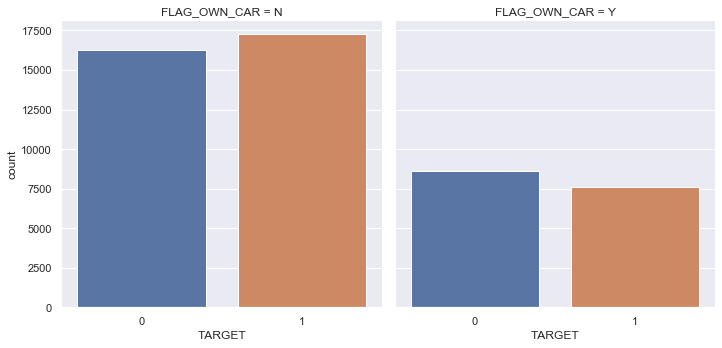

In [16]:
sns.factorplot(x='TARGET', data=graph_data, kind='count', col='FLAG_OWN_CAR');

>車を所有している人の方が返済能力が高い

## <a id='anchor6'>6. 家またはアパートを所有しているかどうか（FLAG_OWN_REALTY）</a>

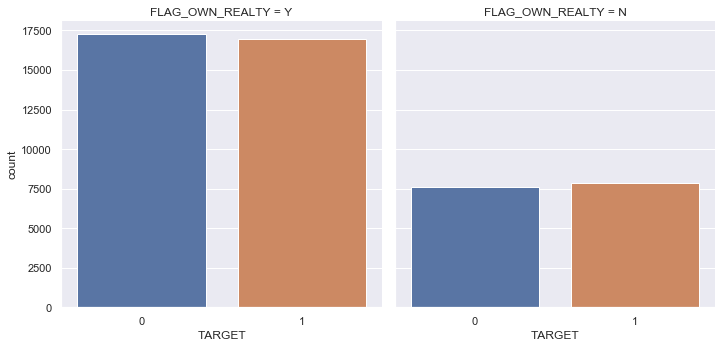

In [17]:
sns.factorplot(x='TARGET', data=graph_data, kind='count', col='FLAG_OWN_REALTY');

>家またはアパートを所有している方が返済能力が高い

## <a id='anchor7'>7. 収入（AMT_INCOME_TOTAL）</a>

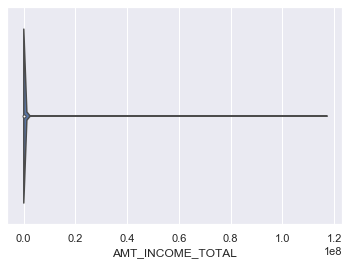

In [18]:
# バイオリン図を描画する
sns.violinplot(graph_data['AMT_INCOME_TOTAL']);

>外れ値があることがわかりました。今回はこれを無視します。

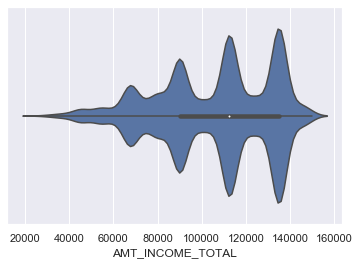

In [19]:
# 外れ値を除去
Filter_Outliers = graph_data[graph_data['AMT_INCOME_TOTAL']<150000]
sns.violinplot(Filter_Outliers['AMT_INCOME_TOTAL']);

>価格帯によって偏りが見られました。このデータを四分位数に従って３つのクラスに分けます。

In [20]:
# 四分位数を表示
Filter_Outliers['AMT_INCOME_TOTAL'].describe()

count     25633.000000
mean     105786.346412
std       26238.729254
min       25650.000000
25%       90000.000000
50%      112500.000000
75%      135000.000000
max      149850.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [126]:
# AMT_INCOME_TOTAL_label列を追加
Filter_Outliers['AMT_INCOME_TOTAL_label'] = Filter_Outliers['AMT_INCOME_TOTAL']

# 年収をラベルに変更
Filter_Outliers['AMT_INCOME_TOTAL_label'][Filter_Outliers['AMT_INCOME_TOTAL_label']<=90000] = 1
Filter_Outliers['AMT_INCOME_TOTAL_label'][(Filter_Outliers['AMT_INCOME_TOTAL_label']>90000) & (Filter_Outliers['AMT_INCOME_TOTAL_label']<135000)] = 2
Filter_Outliers['AMT_INCOME_TOTAL_label'][Filter_Outliers['AMT_INCOME_TOTAL_label']>=135000] = 3
Filter_Outliers['AMT_INCOME_TOTAL_label'] = Filter_Outliers['AMT_INCOME_TOTAL_label'].astype(int)

# ラベル名変更
Filter_Outliers['AMT_INCOME_TOTAL_label'] = Filter_Outliers['AMT_INCOME_TOTAL_label'].map({1: 'Low', 2: 'Medium', 3: 'High'})

hide_toggle()

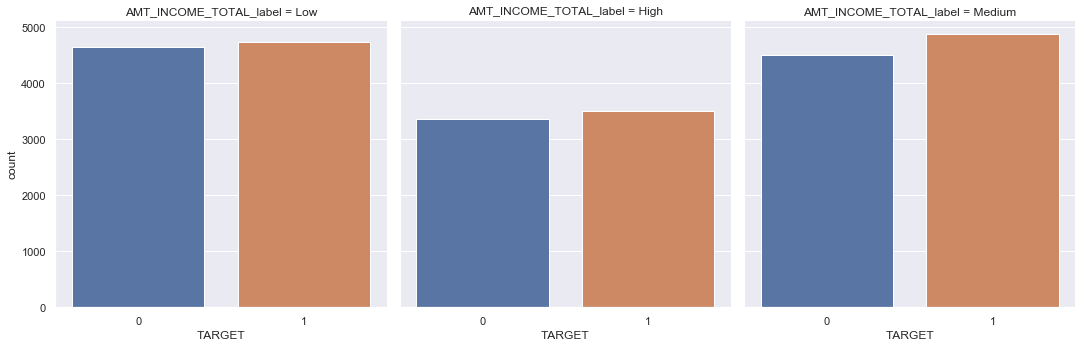

In [35]:
sns.factorplot(x='TARGET', data=Filter_Outliers, kind='count', col='AMT_INCOME_TOTAL_label');

>全ての価格帯でわずかながらラベル1が多い結果になりました。つまり、除外した価格帯の中にラベル0が多く含まれている価格帯がある可能性があります。

## <a id='anchor8'>8. 高収入の価格帯でラベルを比較する。</a>　　　　　　　　　　[▲](#anchor)

In [42]:
high_class = graph_data[graph_data['AMT_INCOME_TOTAL']>=150000]
high_class['AMT_INCOME_TOTAL'].describe()

count    2.401700e+04
mean     2.334743e+05
std      7.682267e+05
min      1.501020e+05
25%      1.800000e+05
50%      2.025000e+05
75%      2.475000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [127]:
# AMT_INCOME_TOTAL_label列を追加
high_class['AMT_INCOME_TOTAL_label'] = high_class['AMT_INCOME_TOTAL']

# 年収をラベルに変更
high_class['AMT_INCOME_TOTAL_label'][high_class['AMT_INCOME_TOTAL_label']<=1.800000e+05] = 1
high_class['AMT_INCOME_TOTAL_label'][(high_class['AMT_INCOME_TOTAL_label']>1.800000e+05) & (high_class['AMT_INCOME_TOTAL_label']<2.475000e+05)] = 2
high_class['AMT_INCOME_TOTAL_label'][high_class['AMT_INCOME_TOTAL_label']>=2.475000e+05] = 3
high_class['AMT_INCOME_TOTAL_label'] = high_class['AMT_INCOME_TOTAL_label'].astype(int)

# ラベル名変更
high_class['AMT_INCOME_TOTAL_label'] = high_class['AMT_INCOME_TOTAL_label'].map({1: 'Low', 2: 'Medium', 3: 'High'})

hide_toggle()

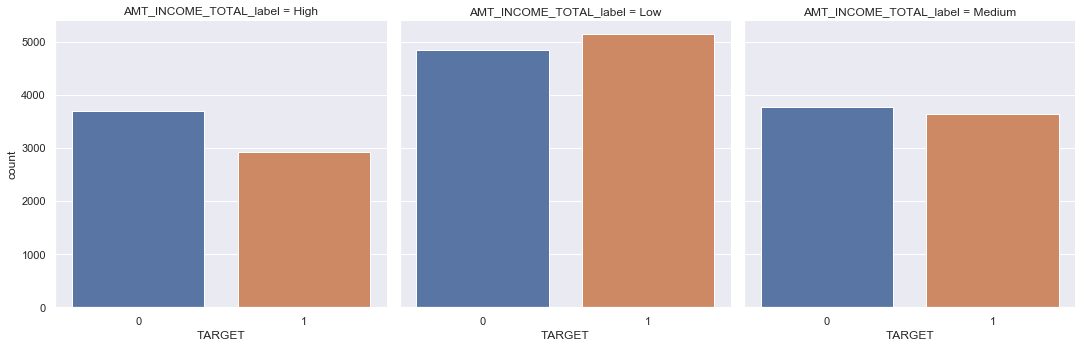

In [44]:
sns.factorplot(x='TARGET', data=high_class, kind='count', col='AMT_INCOME_TOTAL_label');

>年収180,000ドル以上でラベル0がラベル1を上回りました。年収が高いほど返済能力が高い傾向はあるものの僅差であり、返す・返さないには直接関係しないことがわかりました。

## <a id='anchor9'>9. 収入タイプ（NAME_INCOME_TYPE）</a>

In [56]:
# 収入タイプの種類
graph_data['NAME_INCOME_TYPE'].value_counts()

Working                 27840
Commercial associate    11090
Pensioner                7638
State servant            3066
Unemployed                 10
Student                     4
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64

>サンプル数の少ない`Unemployed`, `Student`, `Maternity leave`は除外します。 

In [66]:
# Unemployed, Student, Maternity leaveは除外
FO_NAME_INCOME_TYPE = graph_data[(graph_data['NAME_INCOME_TYPE']!='Unemployed') &
                                 (graph_data['NAME_INCOME_TYPE']!='Student') &
                                 (graph_data['NAME_INCOME_TYPE']!='Maternity leave')]

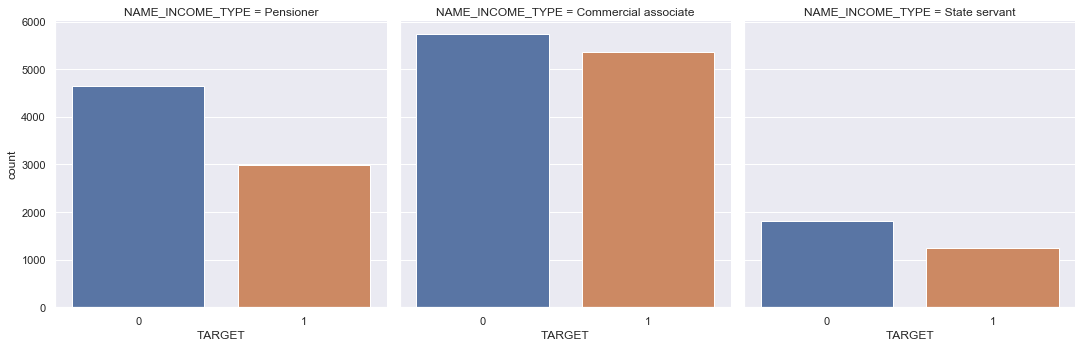

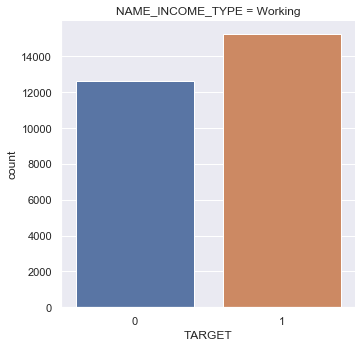

In [65]:
sns.factorplot(x='TARGET', data=FO_NAME_INCOME_TYPE[graph_data['NAME_INCOME_TYPE']!='Working'], kind='count', col='NAME_INCOME_TYPE')
sns.factorplot(x='TARGET', data=FO_NAME_INCOME_TYPE[graph_data['NAME_INCOME_TYPE']=='Working'], kind='count', col='NAME_INCOME_TYPE');

>`Pensioner`, `State servant`, `Commercial associate`, `Working`の順で返済能力が高い傾向があります。これまでで一番明確な差が得られました。

## <a id='anchor10'>10. 学歴（NAME_EDUCATION_TYPE）</a>

In [67]:
# 学歴の種類
graph_data['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    36963
Higher education                 10292
Incomplete higher                 1679
Lower secondary                    701
Academic degree                     15
Name: NAME_EDUCATION_TYPE, dtype: int64

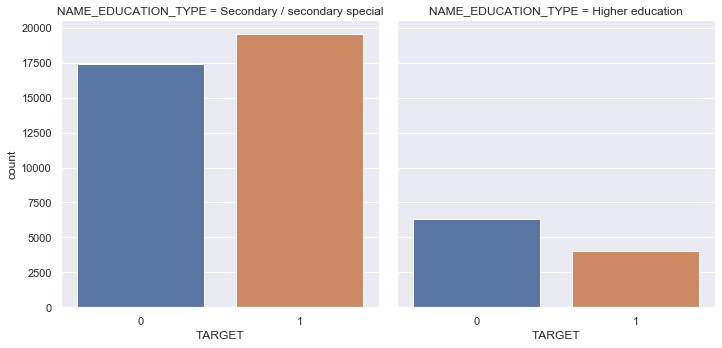

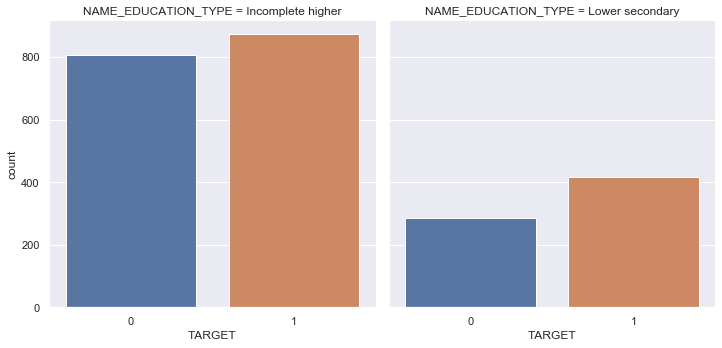

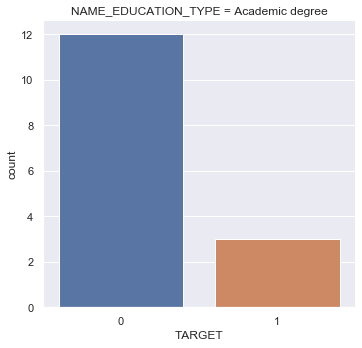

In [91]:
sns.factorplot(x='TARGET',
               data=graph_data[(graph_data['NAME_EDUCATION_TYPE']=='Secondary / secondary special') |
                               (graph_data['NAME_EDUCATION_TYPE']=='Higher education')],
               kind='count',
               col='NAME_EDUCATION_TYPE')

sns.factorplot(x='TARGET',
               data=graph_data[(graph_data['NAME_EDUCATION_TYPE']=='Incomplete higher') |
                               (graph_data['NAME_EDUCATION_TYPE']=='Lower secondary')],
               kind='count',
               col='NAME_EDUCATION_TYPE')

sns.factorplot(x='TARGET',
               data=graph_data[graph_data['NAME_EDUCATION_TYPE']=='Academic degree'],
               kind='count',
               col='NAME_EDUCATION_TYPE');

>`Higher education`と`Academic degree`の返済能力が高い

## <a id='anchor11'>11. 携帯電話が繋がるかどうか（FLAG_CONT_MOBILE）</a>

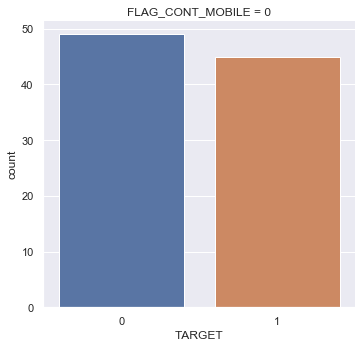

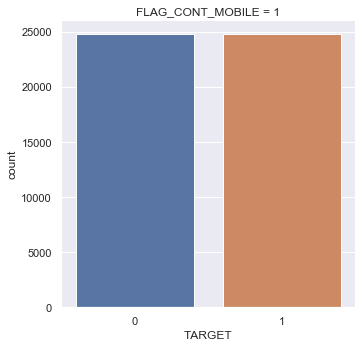

In [101]:
sns.factorplot(x='TARGET', data=graph_data[graph_data['FLAG_CONT_MOBILE']==0], kind='count', col='FLAG_CONT_MOBILE')
sns.factorplot(x='TARGET', data=graph_data[graph_data['FLAG_CONT_MOBILE']==1], kind='count', col='FLAG_CONT_MOBILE');

>これは全く関係がなさそうです。

## <a id='anchor12'>12. 職業（OCCUPATION_TYPE）</a>　　　　　　　　　　[▲](#anchor)

In [114]:
# 職種
graph_data['OCCUPATION_TYPE'].value_counts()

Laborers                 10103
Sales staff               5749
Core staff                3970
Drivers                   3510
Managers                  3102
High skill tech staff     1646
Accountants               1289
Medicine staff            1281
Security staff            1224
Cooking staff             1105
Cleaning staff             819
Low-skill Laborers         507
Private service staff      374
Waiters/barmen staff       268
Secretaries                207
Realty agents              126
HR staff                    93
IT staff                    85
Name: OCCUPATION_TYPE, dtype: int64

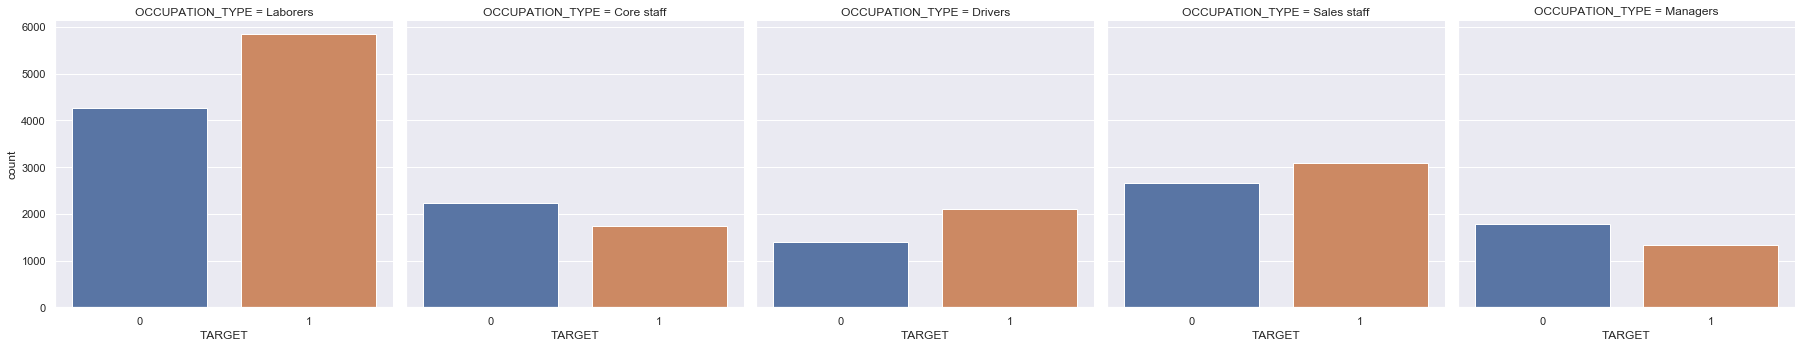

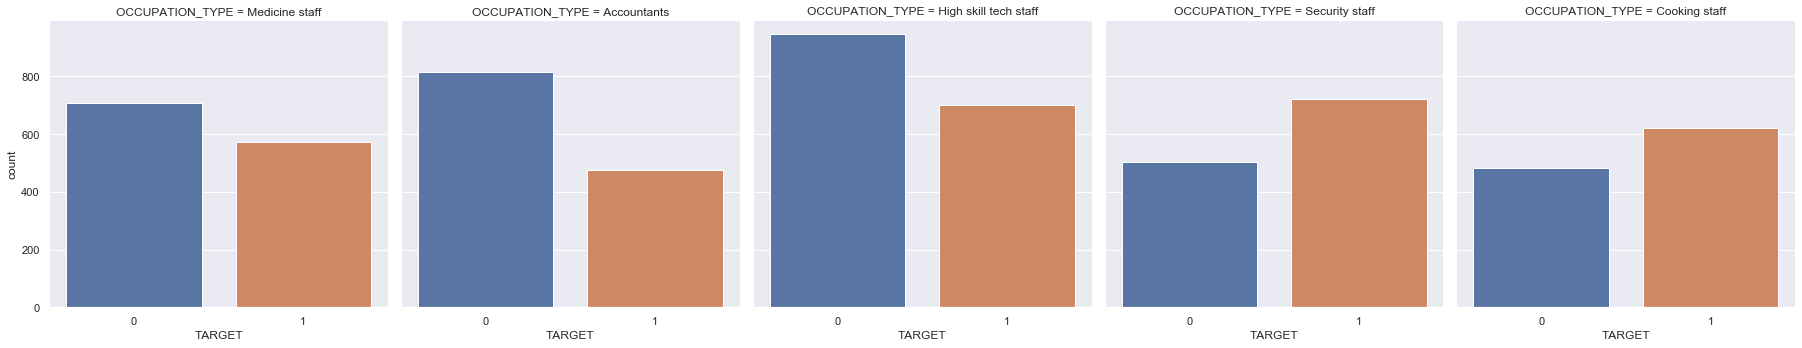

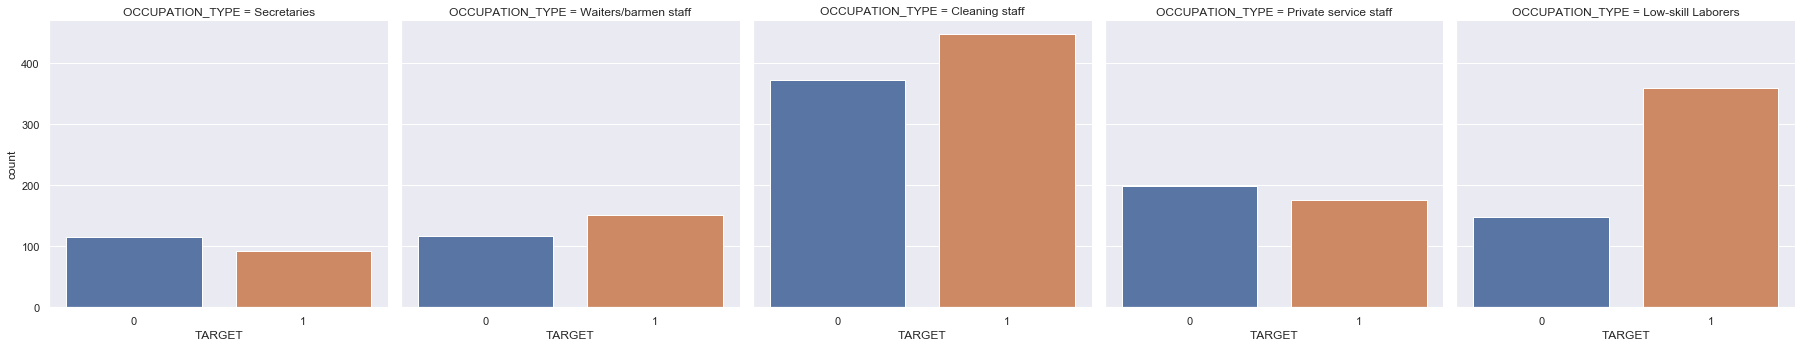

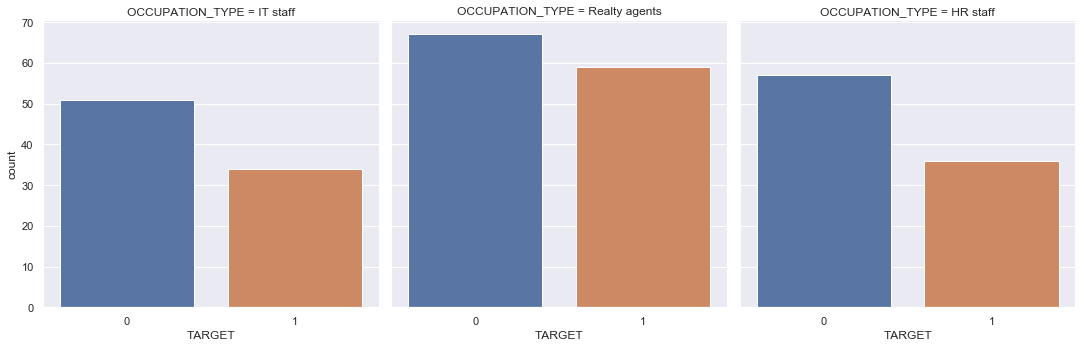

In [128]:
sns.factorplot(x='TARGET',
               data=graph_data[(graph_data['OCCUPATION_TYPE']=='Laborers') |
                               (graph_data['OCCUPATION_TYPE']=='Sales staff') |
                               (graph_data['OCCUPATION_TYPE']=='Core staff') |
                               (graph_data['OCCUPATION_TYPE']=='Drivers') |
                               (graph_data['OCCUPATION_TYPE']=='Managers')],
               kind='count',
               col='OCCUPATION_TYPE')

sns.factorplot(x='TARGET',
               data=graph_data[(graph_data['OCCUPATION_TYPE']=='High skill tech staff') |
                               (graph_data['OCCUPATION_TYPE']=='Accountants') |
                               (graph_data['OCCUPATION_TYPE']=='Medicine staff') |
                               (graph_data['OCCUPATION_TYPE']=='Security staff') |
                               (graph_data['OCCUPATION_TYPE']=='Cooking staff')],
               kind='count',
               col='OCCUPATION_TYPE')

sns.factorplot(x='TARGET',
               data=graph_data[(graph_data['OCCUPATION_TYPE']=='Cleaning staff') |
                               (graph_data['OCCUPATION_TYPE']=='Low-skill Laborers') |
                               (graph_data['OCCUPATION_TYPE']=='Private service staff') |
                               (graph_data['OCCUPATION_TYPE']=='Waiters/barmen staff') |
                               (graph_data['OCCUPATION_TYPE']=='Secretaries')],
               kind='count',
               col='OCCUPATION_TYPE')

sns.factorplot(x='TARGET',
               data=graph_data[(graph_data['OCCUPATION_TYPE']=='Realty agents') |
                               (graph_data['OCCUPATION_TYPE']=='HR staff') |
                               (graph_data['OCCUPATION_TYPE']=='IT staff')],
               kind='count',
               col='OCCUPATION_TYPE');

hide_toggle()

>`Accountants`や`IT staff`など専門性が高い職種や`Managers`,`HR staff`のように社交性が高い職種で返済能力が高いことがわかりました。その裏付けとして`Low-skill Laborers`の約7割が返済能力がありません。  
しかし、先ほど収入がさほど返済能力に依存しないことを確認しました。一般的には専門性が高い職種ほど収入が高くその逆では低くなるものです。そこで、職種と収入の関係を見ていきます。

EDA中に、気がついたNG行為  
ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー

In [123]:
# ラベルの分布を見やすくするために、ラベルの割合が同じデータを作成

target_0 = train_data[train_data['TARGET']==0]
target_1 = train_data[train_data['TARGET']==1]
target_0 = target_0.sample(n=len(target_1), random_state=0)
simple_data = pd.concat([target_0, target_1])

simple_data = simple_data.reset_index().drop('index', axis=1)

In [25]:
# 抽出行数に対して元のデータ数が大きいため、df.sample()のブレを確認
def get_max_corr(n):
    target_0 = train_data[train_data['TARGET']==0]
    target_1 = train_data[train_data['TARGET']==1]
    target_0 = target_0.sample(n=len(target_1), random_state=n)
    simple_data = pd.concat([target_0, target_1])
    simple_data = simple_data.reset_index().drop('index', axis=1)
    max_corr = simple_data.corr()['TARGET'].abs().nlargest(5)[1]
    return max_corr

# random_state10パターンの相関係数の最大
max_corr_list = [get_max_corr(i) for i in range(10)]
print(max_corr_list)
print(f'平均：{sum(max_corr_list) / len(max_corr_list)}')

[0.31402762565859665, 0.315101003063268, 0.30607154457421076, 0.3132953269539101, 0.3130951232182541, 0.30584089207104875, 0.30732881292502556, 0.3101903637156462, 0.3115837537858773, 0.311529153827529]
平均：0.31080635997933664


In [26]:
train_data['TARGET'].std()

0.272418645647685

In [27]:
simple_data['TARGET'].std()

0.5000050353227895

>安易にサンプル数を変更すると、正確なデータ分析ができなくなります。今回は目的変数の割合を変更したことで標準偏差が変わり、相関係数が変わってしまいました。